In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import plot_importance

In [3]:
df = pd.read_csv(r"C:\Users\harec\Downloads\test_heart\Cardiovascular_Disease_Dataset.csv")

print(df.shape)

(1000, 14)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [5]:
df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [6]:
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [7]:
numeric_cols = ['age','restingBP','serumcholestrol','maxheartrate','oldpeak']
categorical_cols = ['gender','chestpain','fastingbloodsugar','restingrelectro','exerciseangia','slope','noofmajorvessels','target']

c:\Users\harec\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\harec\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\harec\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\harec\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

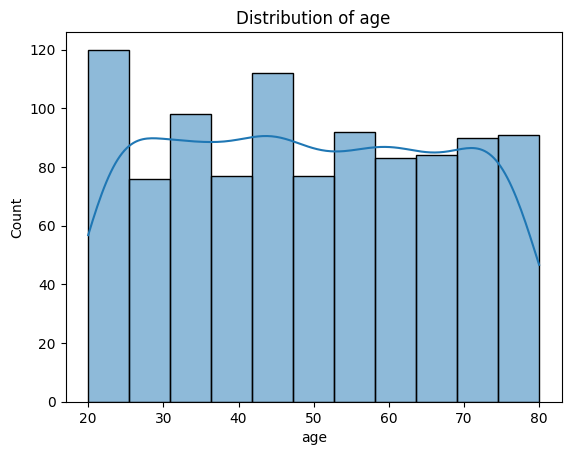

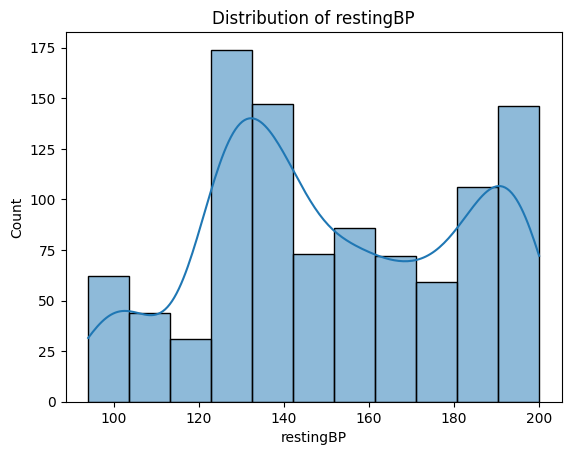

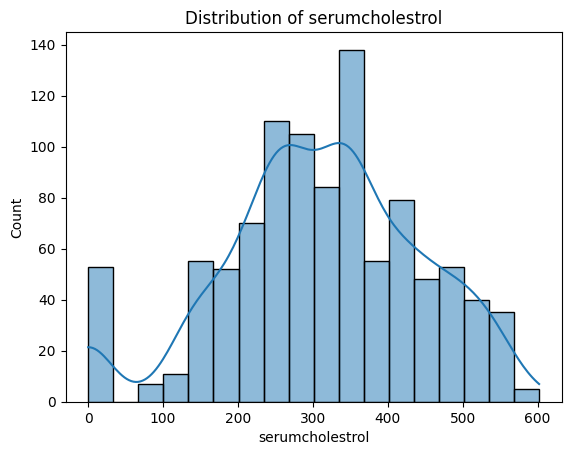

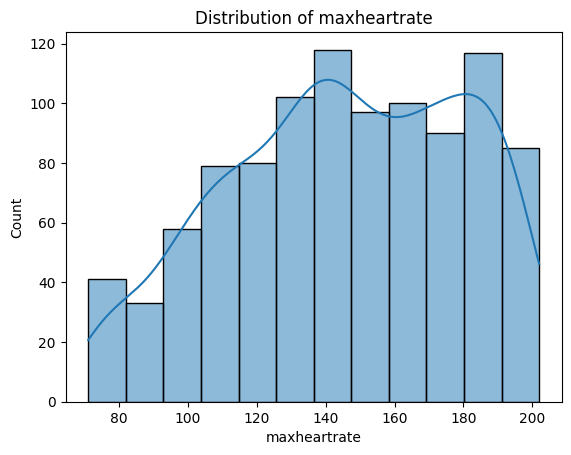

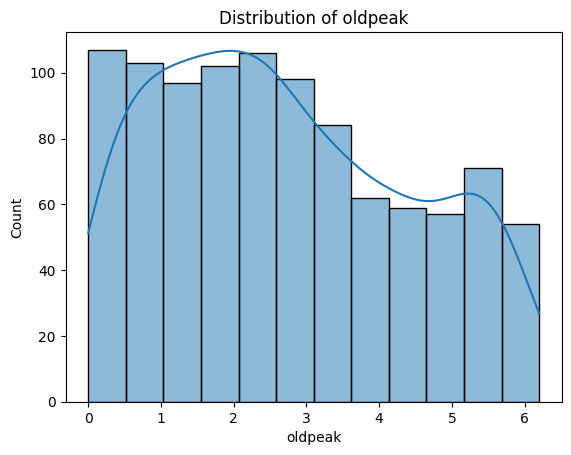

In [8]:
# Numeric histograms
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

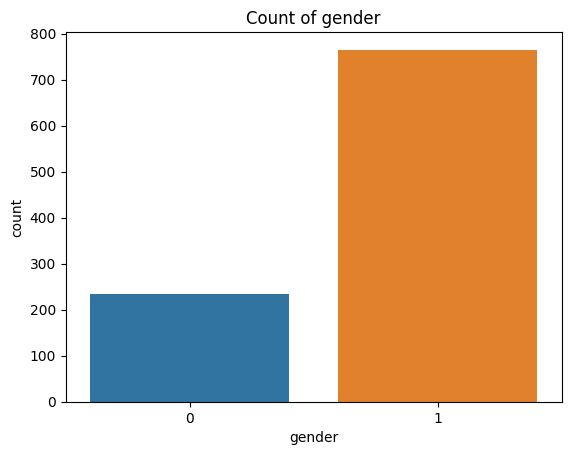

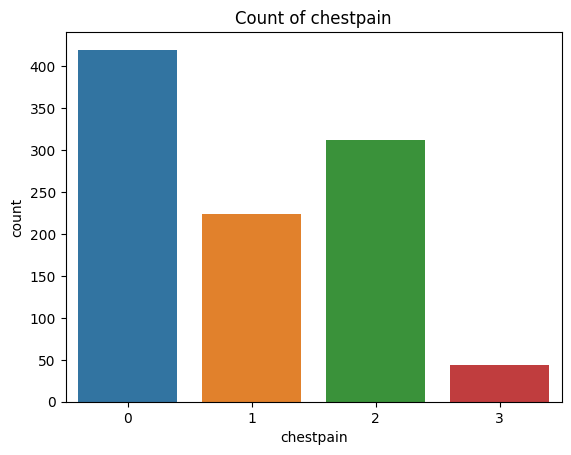

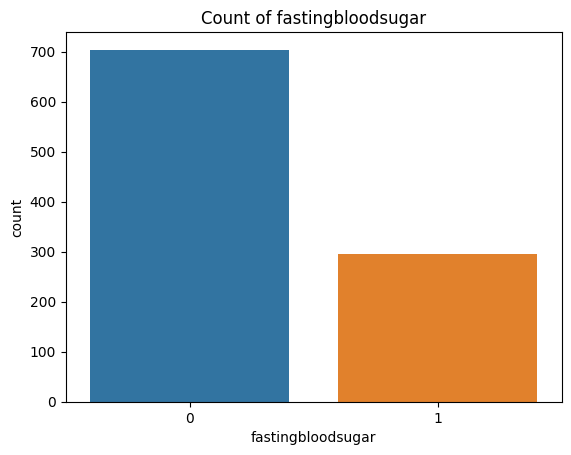

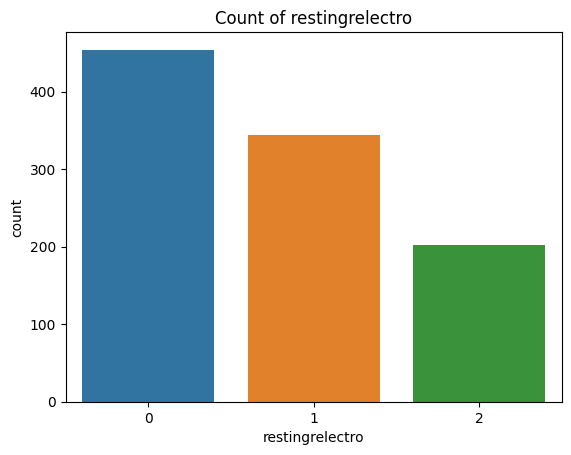

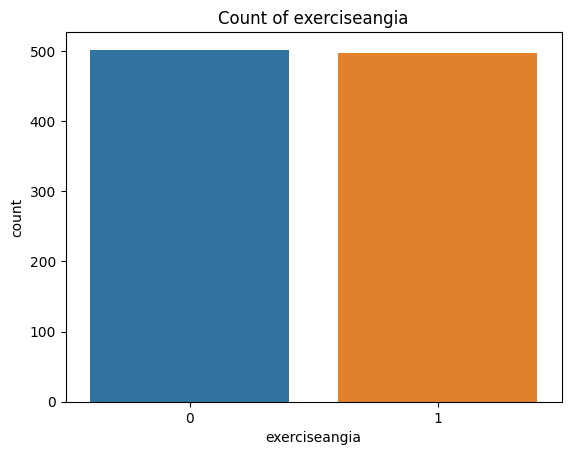

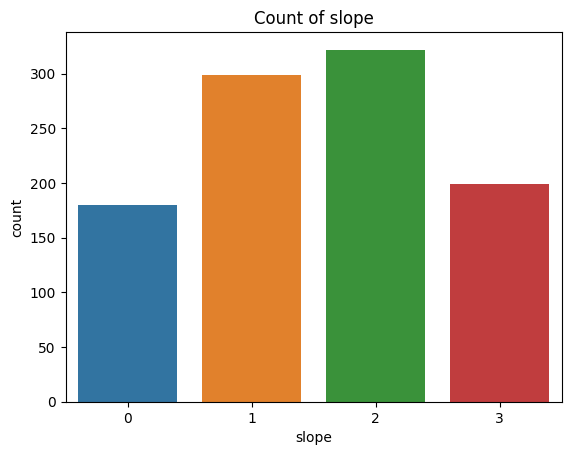

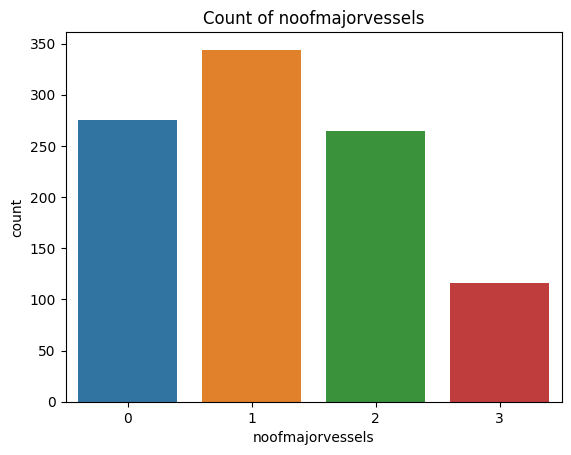

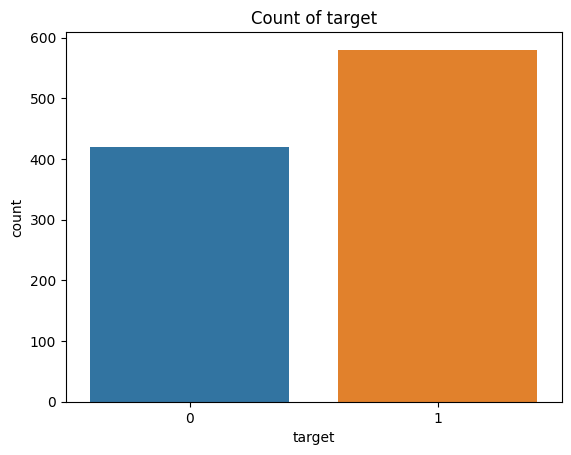

In [9]:
# Categorical counts
for col in categorical_cols:
    plt.figure()
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")

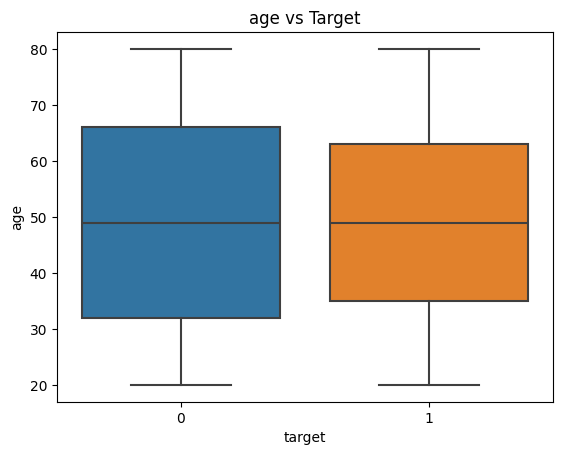

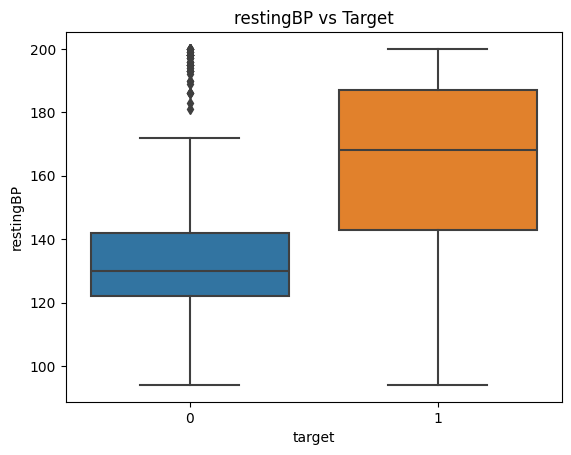

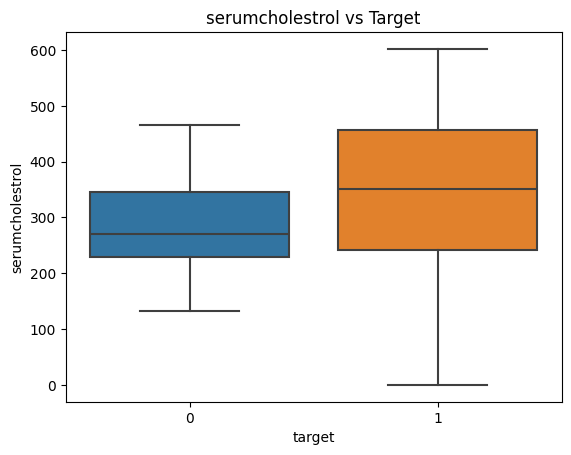

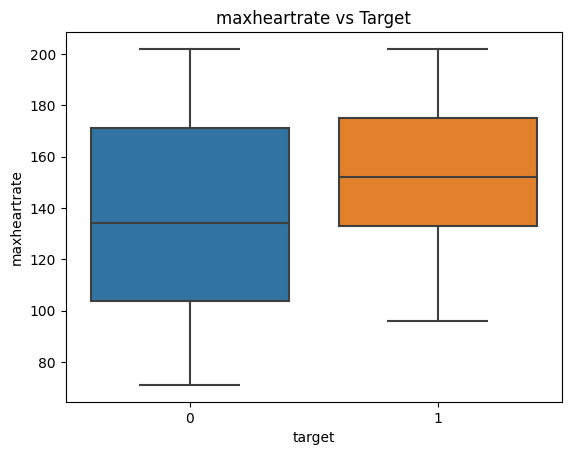

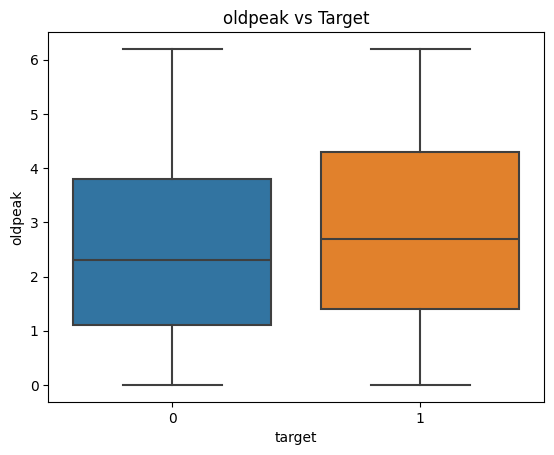

In [10]:
# Numeric vs Target
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f"{col} vs Target")


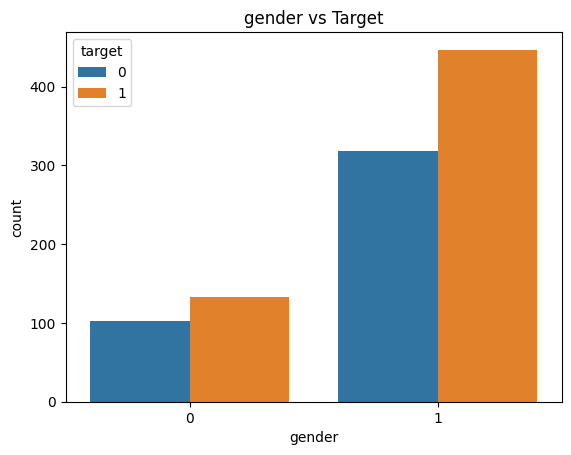

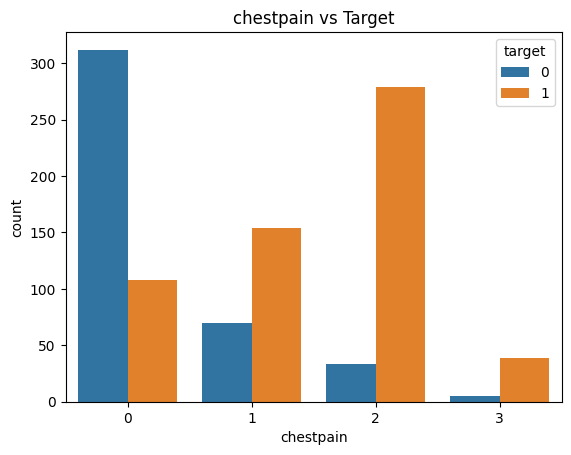

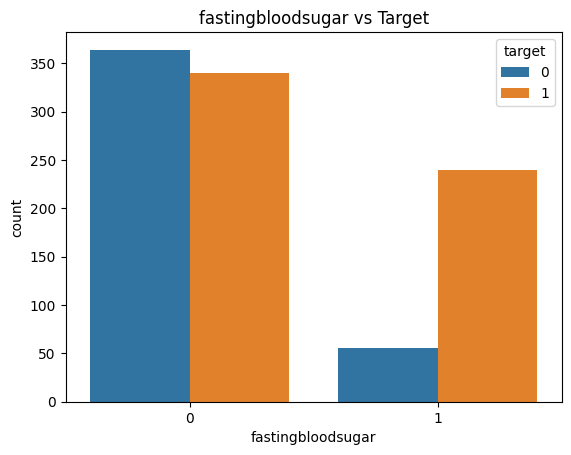

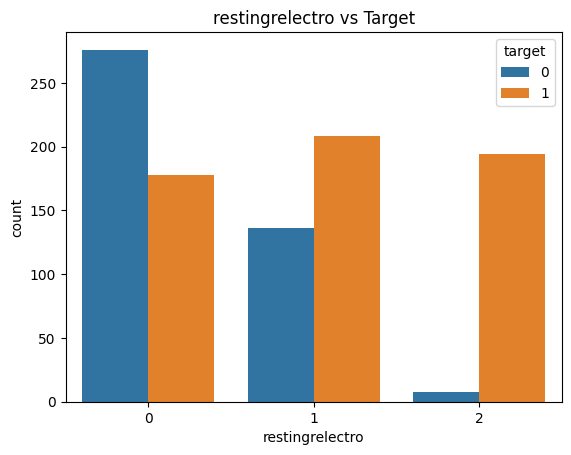

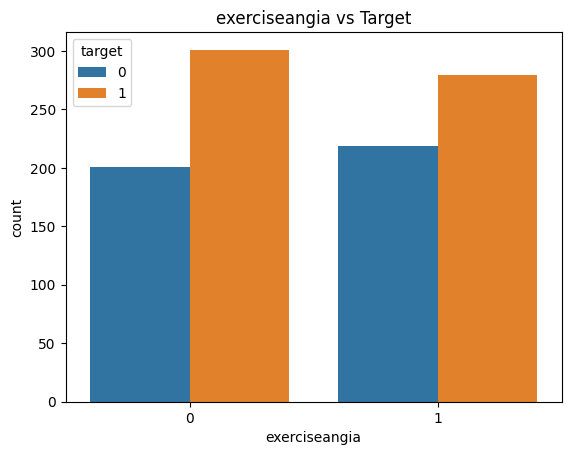

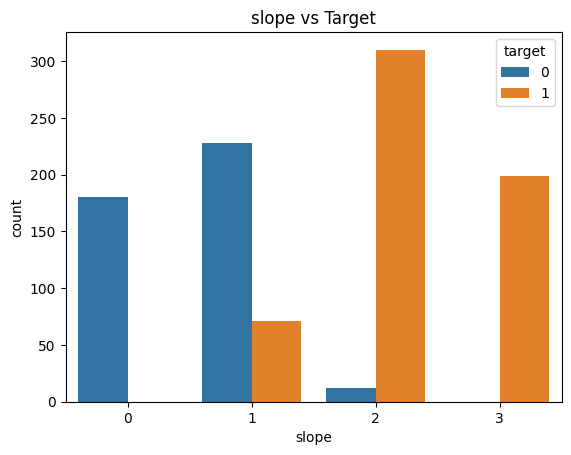

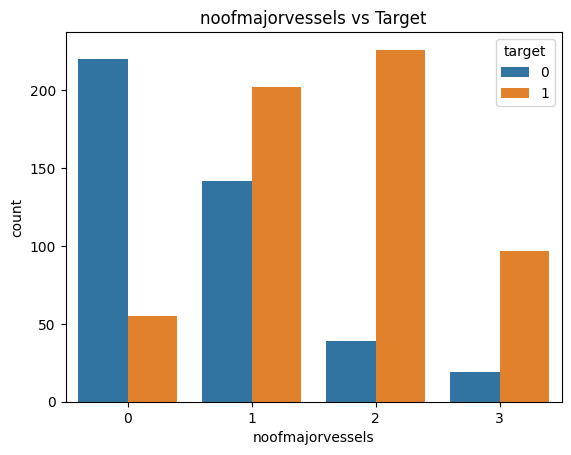

In [11]:
# Categorical vs Target
for col in categorical_cols:
    if col != 'target':
        plt.figure()
        sns.countplot(x=col, hue='target', data=df)
        plt.title(f"{col} vs Target")

In [12]:
df = df[(df['restingBP'] >= 94) & (df['restingBP'] <= 200)]
df = df[(df['serumcholestrol'] >= 126) & (df['serumcholestrol'] <= 564)]
df = df[(df['maxheartrate'] >= 71) & (df['maxheartrate'] <= 202)]
df = df[(df['oldpeak'] >= 0) & (df['oldpeak'] <= 6.2)]


In [13]:
df.drop(columns=['patientid'], inplace=True)


In [14]:
df['slope'] = df['slope'].replace(0, 1)

In [15]:
# Example binning
df['restingBP_bin'] = pd.cut(df['restingBP'], bins=[90, 120, 140, 160, 200], labels=[0, 1, 2, 3]).astype(int)



In [16]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

In [17]:
df.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target,restingBP_bin
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0,1
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1,1
6,79,1,2,130,240,0,2,157,0,2.5,2,1,1,1
7,52,1,0,127,345,0,0,192,1,4.9,1,0,0,1


In [18]:
df.describe()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target,restingBP_bin
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,49.333690,0.762567,0.967914,150.992513,329.237433,0.313369,0.724064,144.841711,0.504813,2.699893,1.684492,1.200000,0.550802,1.809626
std,17.916888,0.425738,0.959031,30.189958,110.047835,0.464111,0.762342,34.592838,0.500244,1.703614,0.770109,0.978134,0.497679,1.071388
min,20.000000,0.000000,0.000000,94.000000,132.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,34.000000,1.000000,0.000000,128.000000,248.000000,0.000000,0.000000,118.000000,0.000000,1.300000,1.000000,0.000000,0.000000,1.000000
50%,49.000000,1.000000,1.000000,143.000000,327.000000,0.000000,1.000000,145.000000,1.000000,2.500000,1.000000,1.000000,1.000000,2.000000
75%,65.000000,1.000000,2.000000,181.000000,410.000000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000,3.000000
max,80.000000,1.000000,3.000000,200.000000,561.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000,3.000000


In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for prediction phase


In [20]:
for col in numeric_cols:
    if abs(df[col].skew()) > 1:
        df[col] = np.log1p(df[col])

<Axes: >

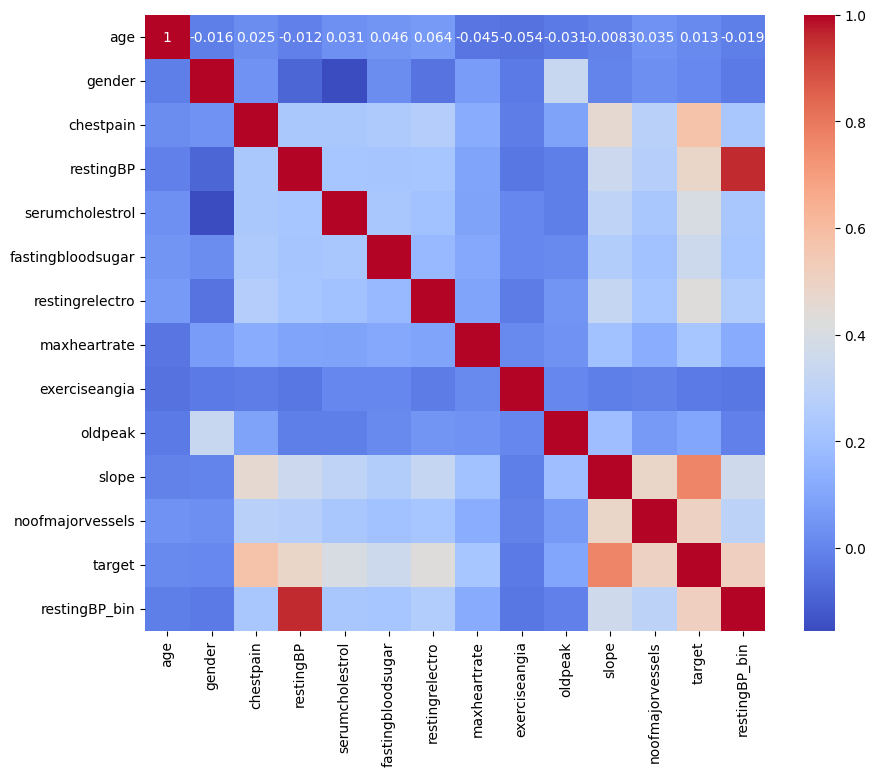

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [22]:
df.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target,restingBP_bin
1,40,1,0,94,229,0,1,115,0,3.7,0,1,0,0
2,49,1,2,133,142,0,0,202,1,5.0,0,0,0,1
3,43,1,0,138,295,1,1,153,0,3.2,1,2,1,1
6,79,1,2,130,240,0,2,157,0,2.5,1,1,1,1
7,52,1,0,127,345,0,0,192,1,4.9,0,0,0,1


In [23]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
dt = DecisionTreeClassifier(random_state=42)

params_dt = {
    'max_depth': [3,5,7,9],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

grid_dt = GridSearchCV(dt, params_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [25]:
best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9572192513368984


In [26]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss', random_state=42)

params_xgb = {
    'max_depth': [3,5,7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100,200,500],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_lambda': [1, 5, 10]
}

grid_xgb = GridSearchCV(xgb, params_xgb, cv=5, scoring='accuracy',)
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 500],
                         'reg_lambda': [1, 5, 10], 'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [27]:
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.983957219251337


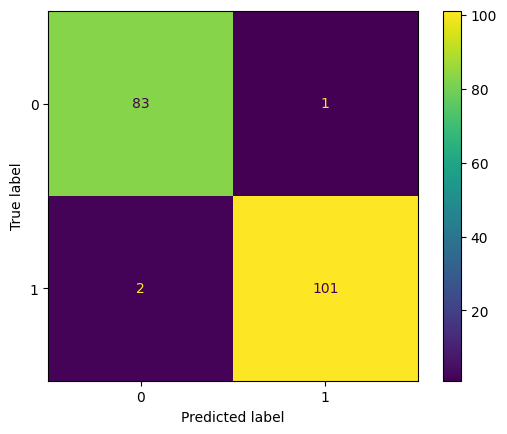

In [28]:
ConfusionMatrixDisplay.from_estimator(best_xgb, X_test, y_test)

In [29]:
print("Train Accuracy:", best_xgb.score(X_train, y_train))
print("Test Accuracy :", best_xgb.score(X_test, y_test))

Train Accuracy: 1.0
Test Accuracy : 0.983957219251337


In [30]:
print("Train Accuracy:", best_dt.score(X_train, y_train))
print("Test Accuracy :", best_dt.score(X_test, y_test))

Train Accuracy: 0.9866310160427807
Test Accuracy : 0.9572192513368984


In [31]:
import joblib

# Save best XGBoost model
joblib.dump(best_xgb, 'xgb_heart_model1.pkl')

['xgb_heart_model1.pkl']

In [32]:
df.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target,restingBP_bin
1,40,1,0,94,229,0,1,115,0,3.7,0,1,0,0
2,49,1,2,133,142,0,0,202,1,5.0,0,0,0,1
3,43,1,0,138,295,1,1,153,0,3.2,1,2,1,1
6,79,1,2,130,240,0,2,157,0,2.5,1,1,1,1
7,52,1,0,127,345,0,0,192,1,4.9,0,0,0,1


In [33]:
df.describe()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target,restingBP_bin
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,49.333690,0.762567,0.967914,150.992513,329.237433,0.313369,0.724064,144.841711,0.504813,2.699893,0.684492,1.200000,0.550802,1.809626
std,17.916888,0.425738,0.959031,30.189958,110.047835,0.464111,0.762342,34.592838,0.500244,1.703614,0.770109,0.978134,0.497679,1.071388
min,20.000000,0.000000,0.000000,94.000000,132.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,1.000000,0.000000,128.000000,248.000000,0.000000,0.000000,118.000000,0.000000,1.300000,0.000000,0.000000,0.000000,1.000000
50%,49.000000,1.000000,1.000000,143.000000,327.000000,0.000000,1.000000,145.000000,1.000000,2.500000,0.000000,1.000000,1.000000,2.000000
75%,65.000000,1.000000,2.000000,181.000000,410.000000,1.000000,1.000000,175.000000,1.000000,4.100000,1.000000,2.000000,1.000000,3.000000
max,80.000000,1.000000,3.000000,200.000000,561.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,1.000000,3.000000


In [34]:
df = df.drop('restingBP', axis=1)

In [42]:
import joblib
import numpy as np
import pandas as pd

# === Load trained model ===
model = joblib.load("xgb_heart_model1.pkl")

# === Get user input ===
def get_user_input():
    print("\nEnter the following health parameters:")

    data = {
        "age": int(input("Age (years): ")),
        "gender": int(input("Gender (0 = Female, 1 = Male): ")),
        "chestpain": int(input("Chest pain type (0=typical angina, 1=atypical angina, 2=non-anginal, 3=asymptomatic): ")),
        "restingBP": int(input("Resting Blood Pressure (mm Hg): ")),
        "serumcholestrol": int(input("Serum Cholesterol (mg/dl): ")),
        "fastingbloodsugar": int(input("Fasting Blood Sugar > 120 mg/dl (1=True, 0=False): ")),
        "restingrelectro": int(input("Resting ECG (0=Normal, 1=ST-T abnormality, 2=LVH): ")),
        "maxheartrate": int(input("Maximum Heart Rate Achieved: ")),
        "exerciseangia": int(input("Exercise-Induced Angina (1=Yes, 0=No): ")),
        "oldpeak": float(input("Oldpeak (ST depression): ")),
        "slope": int(input("Slope of Peak ST Segment (1=upsloping, 2=flat, 3=downsloping): ")),
        "noofmajorvessels": int(input("Number of Major Vessels (0-3): "))
    }

    return pd.DataFrame([data])

# === Preprocessing ===
def preprocess_input(df):
    # Clip raw feature values (to stay within training bounds)
    df['restingBP'] = df['restingBP'].clip(94, 200)
    df['serumcholestrol'] = df['serumcholestrol'].clip(126, 564)
    df['maxheartrate'] = df['maxheartrate'].clip(71, 202)
    df['oldpeak'] = df['oldpeak'].clip(0, 6.2)

    # === Create bin for restingBP ===
    df['restingBP_bin'] = pd.cut(
        df['restingBP'],
        bins=[90, 120, 140, 160, 200],
        labels=[0, 1, 2, 3]
    ).astype(int)

    # Drop the original 'restingBP' as it was not used in training
    df.drop(columns=['restingBP'], inplace=True)

    # Apply log1p to other skewed features (NOT restingBP)
    for col in ['serumcholestrol', 'oldpeak']:
        df[col] = np.log1p(df[col])

    # Make sure all expected columns exist
    expected_cols = model.get_booster().feature_names
    for col in expected_cols:
        if col not in df.columns:
            df[col] = 0  # Add missing features with 0

    # Keep only the features used in training
    return df[expected_cols]

# === Predict ===
def predict(df):
    prediction = model.predict(df)[0]
    proba = model.predict_proba(df)[0][int(prediction)]
    result = "🔴 Presence of Heart Disease" if prediction == 1 else "🟢 No Heart Disease Detected"
    return prediction, result, round(proba * 100, 2)

# === Main ===
if __name__ == "__main__":
    user_input = get_user_input()
    preprocessed = preprocess_input(user_input)
    prediction, result, confidence = predict(preprocessed)

    print("\n📊 Prediction Result:")
    print(result)
    print(f"Confidence: {confidence}%")



Enter the following health parameters:

📊 Prediction Result:
🔴 Presence of Heart Disease
Confidence: 99.36%


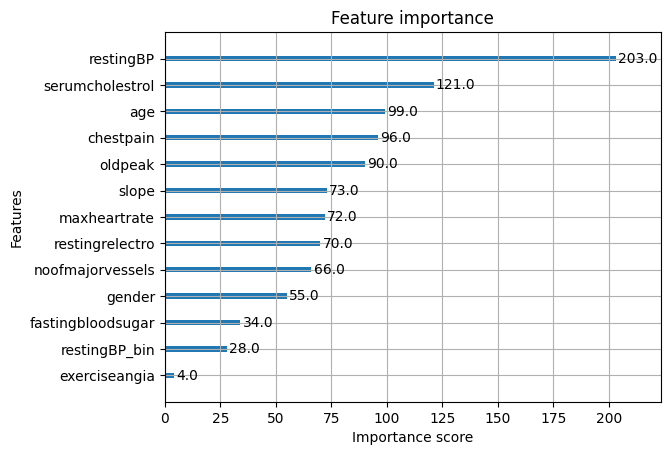

In [36]:
from xgboost import plot_importance

plot_importance(best_xgb)
plt.show()